In [131]:
from __future__ import print_function
import cv2

import sys
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt
    
if sys.version_info >= (3, 0, 0):
    import urllib.request as urllib # ugly but works
else:
    import urllib

from keras.preprocessing.image import save_img

print(sys.version_info) 

# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data
DATA_PATH = './data/stl10_binary/train_X.bin'

# path to the binary train file with labels
LABEL_PATH = './data/stl10_binary/train_y.bin'

def read_labels(path_to_labels):
    """
    :param path_to_labels: path to the binary file containing labels from the STL-10 dataset
    :return: an array containing the labels
    """
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, 3, 96, 96))

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def read_single_image(image_file):
    """
    CAREFUL! - this method uses a file as input instead of the path - so the
    position of the reader will be remembered outside of context of this method.
    :param image_file: the open file containing the images
    :return: a single image
    """
    # read a single image, count determines the number of uint8's to read
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    # force into image matrix
    image = np.reshape(image, (3, 96, 96))
    # transpose to standard format
    # You might want to comment this line or reverse the shuffle
    # if you will use a learning algorithm like CNN, since they like
    # their channels separated.
    image = np.transpose(image, (2, 1, 0))
    return image


def plot_image(image):
    """
    :param image: the image to be plotted in a 3-D matrix format
    :return: None
    """
    plt.imshow(image)
    plt.show()



def download_and_extract():
    """
    Download and extract the STL-10 dataset
    :return: None
    """
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)




sys.version_info(major=3, minor=10, micro=8, releaselevel='final', serial=0)


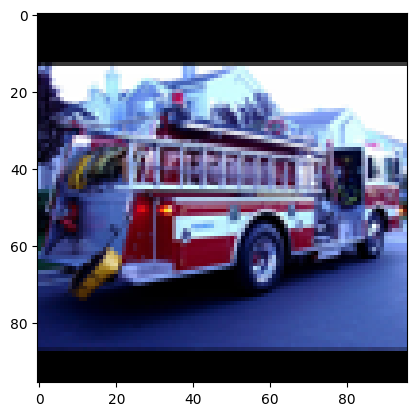

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


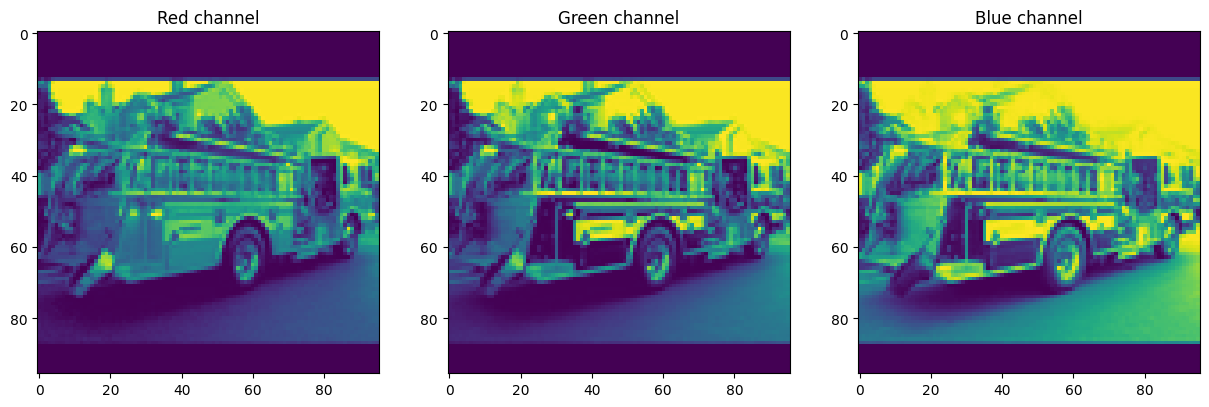

In [132]:

#Get the data ferom the test_X.bin file and print a random image
import random


download_and_extract()

images_train = read_all_images('./data/stl10_binary/train_X.bin')
labels_train = read_labels('./data/stl10_binary/train_y.bin')

images_test = read_all_images('./data/stl10_binary/test_X.bin')
labels_test = read_labels('./data/stl10_binary/test_y.bin')

n = random.randint(0, 4999)
plot_image(images_train[5])
print(images_train[5])

#Make a vairable img with image[5] but in greyscale

#img = cv2.cvtColor(images[5], cv2.COLOR_BGR2GRAY)

img_r = images_train[5][:,:,0]
img_g = images_train[5][:,:,1]
img_b = images_train[5][:,:,2]


#Plot the three channel of the image side to side

plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(img_r)
plt.title("Red channel")
plt.subplot(1,3,2)
plt.imshow(img_g)
plt.title("Green channel")
plt.subplot(1,3,3)
plt.imshow(img_b)
plt.title("Blue channel")
plt.show()


In [133]:

#import the sobel from scipy
from scipy import ndimage
from scipy import signal


def grid(n_points_x = 6, n_points_y = 6):
    x = np.linspace(8, 88, n_points_x)
    y = np.linspace(8, 88, n_points_y)
    x, y = np.meshgrid(x, y)
    #Make x and y integer arrays
    x = x.astype(int)
    y = y.astype(int)
    return x.flatten(), y.flatten()

x, y = grid()


cell_size = 4
block_size = 4
nbins = 8
npoints = 32





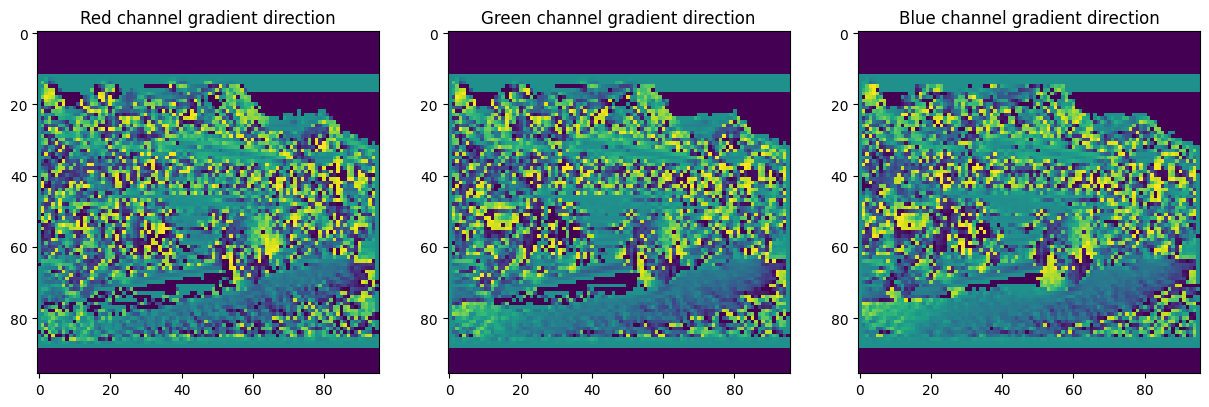

In [134]:

##RED CHANNEL
gx_r = cv2.Sobel(img_r, cv2.CV_64F, 1, 0, ksize=1)
gy_r = cv2.Sobel(img_r, cv2.CV_64F, 0, 1, ksize=1)

angle_r = np.arctan2(gy_r, gx_r) * (180 / np.pi) % 180

##GREEN CHANNEL
gx_g = cv2.Sobel(img_g, cv2.CV_64F, 1, 0, ksize=1)
gy_g = cv2.Sobel(img_g, cv2.CV_64F, 0, 1, ksize=1)

angle_g = np.arctan2(gy_g, gx_g) * (180 / np.pi) % 180

##BLUE CHANNEL
gx_b = cv2.Sobel(img_b, cv2.CV_64F, 1, 0, ksize=1)
gy_b = cv2.Sobel(img_b, cv2.CV_64F, 0, 1, ksize=1)

angle_b = np.arctan2(gy_b, gx_b) * (180 / np.pi) % 180


plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(angle_r)
plt.title("Red channel gradient direction")
plt.subplot(1,3,2)
plt.imshow(angle_g)
plt.title("Green channel gradient direction")
plt.subplot(1,3,3)
plt.imshow(angle_b)
plt.title("Blue channel gradient direction")
plt.show()


In [135]:


#For each grid point, compute the 16 histograms of the 4x4 cells overlapping the grid point.

#define histograms as an empty np array




#Get ONLY the 16 cells arround a point using the cell size is 4  and considering the point is the center of a 4 * 4 cells

def get_cells(img, x_coord, y_coord, cell_size = 4):

        gx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=1)
        gy = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=1)
        img = np.arctan2(gy, gx) * (180 / np.pi) % 180
        x_range = (x_coord-cell_size*2, x_coord+cell_size*2)
        y_range = (y_coord-cell_size*2, y_coord+cell_size*2)

        cells = np.zeros((16, cell_size, cell_size))
        for i in range(4):
            for j in range(4):
                cells[i*4+j] = img[x_range[0]+i*cell_size:x_range[0]+(i+1)*cell_size, y_range[0]+j*cell_size:y_range[0]+(j+1)*cell_size]

        return cells


def get_cell_histogram(cell, nbins = 8):
    hist = np.zeros(nbins)
    for i in range(cell.shape[0]):
         pass


get_cells(img_r, 8, 8)

array([[[  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ]],

       [[  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ],
    

In [136]:
k = get_cells(img_r, 8, 8)


def get_histograms(cells):
    
    #initialize histograms as an empty np array
    histograms = []
    for cell in cells:
        hist = np.histogram(cell.flatten(), bins=8, range=(0, 180))
        histograms.append(hist[0])
    #Return histograms flattened
    return np.array(histograms).flatten()


def get_all_histograms(img, x_array, y_array):
    histograms = []
    for x, y in zip(x_array, y_array):
        cells = get_cells(img, x, y)
        histograms.append(get_histograms(cells))
    return np.array(histograms)


HOG_r = get_all_histograms(img_r, x, y)
HOG_g = get_all_histograms(img_g, x, y)
HOG_b = get_all_histograms(img_b, x, y)

HOG_g


#Add the value of the three channels to get the final HOG
HOG = HOG_r + HOG_g + HOG_b

HOG

array([[48,  0,  0, ...,  0,  0,  0],
       [ 1,  2,  0, ..., 10,  8,  0],
       [ 4,  9,  2, ...,  2,  1,  0],
       ...,
       [10,  8, 16, ..., 10,  1,  0],
       [ 0,  0, 13, ...,  7, 13,  2],
       [ 4,  3,  7, ...,  0,  0,  0]])

In [137]:
#Apply K-means to the histograms for the BoW second step, dont use any kmeans library, implement it yourself

#Define the Kmeans function



from scipy.spatial.distance import cdist

def kmeans(X, k, max_iter=100):
    #Initialize centroids of dimension 128 using numpy.random.permutation
    centroids = np.random.permutation(X)[:k]

    #Initialize the clusters as an empty list
    clusters = []

    #For each iteration

    for i in range(max_iter):
        #Compute the distance between each point and each centroid
        distances = cdist(X, centroids)
        #Assign each point to the closest centroid
        clusters = np.argmin(distances, axis=1)
        #Update the centroids by taking the mean of the points assigned to each centroid
        centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])

    #Return the centroids and the clusters
    return centroids, clusters



    


centroids, clusters = kmeans(HOG, 10)

print(centroids.shape)
print(clusters.shape)

centroids
    

(10, 128)
(36,)


array([[ 6.33333333,  4.11111111,  4.22222222, ...,  4.11111111,
         4.55555556,  4.66666667],
       [ 0.        ,  0.        ,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       [36.        ,  0.        ,  0.        , ...,  3.        ,
         7.        ,  7.        ],
       ...,
       [ 1.        ,  0.        , 11.        , ...,  0.        ,
         0.        ,  0.        ],
       [36.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.5       ,  2.        ,  2.5       , ...,  4.5       ,
         2.5       ,  2.        ]])

/tmp/ipykernel_54597/3359582588.py:24: RuntimeWarning: Mean of empty slice.
  centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])


[[ 1 12  1 ...  3  7  1]
 [ 2  1  1 ...  4  7  2]
 [ 4  1 13 ...  1  6  4]
 ...
 [ 3  1  4 ...  6 10  1]
 [ 5  4  3 ...  2  4 10]
 [ 2  6  1 ...  2 11  3]]


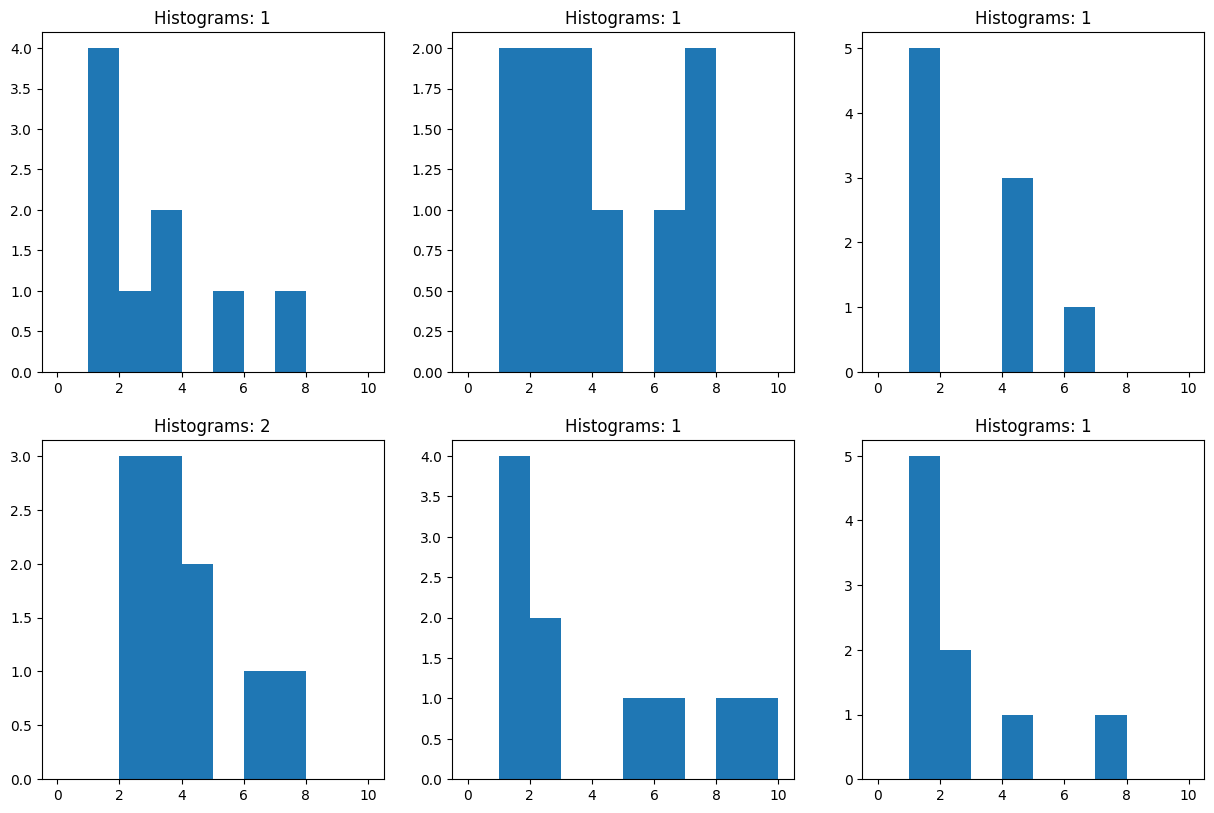

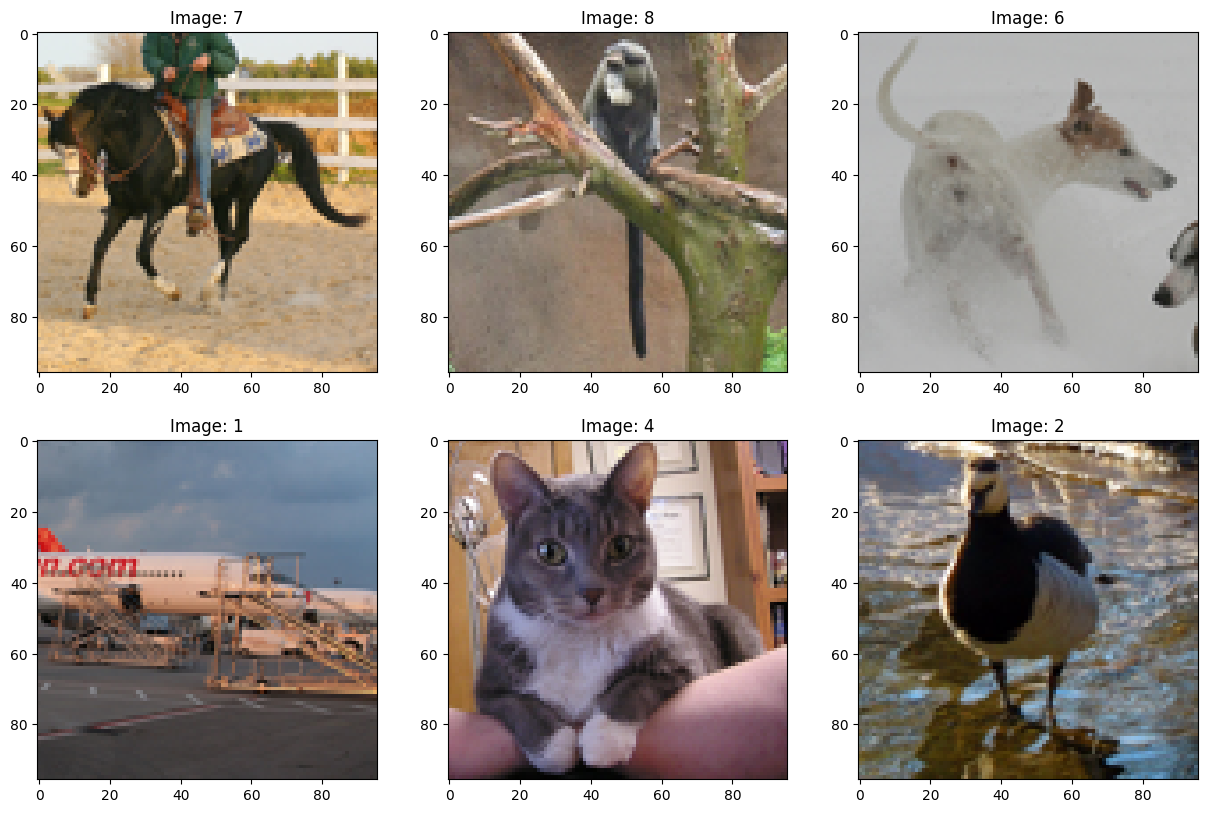

In [141]:
import tqdm

#Define the function to compute the BoW

def compute_BoW(k, source):
    x, y = grid()
    histograms = []


    for image in source:
        HOG = get_all_histograms(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY),x,y)
        centroid, clusters = kmeans(HOG, k)

        histogram = np.histogram(clusters, bins=k, range=(0, k))
        histograms.append(histogram[0])
  
  
    #Return the histograms
    return np.array(histograms)

foo = compute_BoW(10, images_train[0:1000])

#I want to plot a grid of 3x3 images with the histograms on foo

#Get the most frequent element in each histogram

#Define a function to get the most frequent term in a n array



plt.figure(figsize=(15,15))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.hist(foo[i], bins=10, range=(0, 10))
    plt.title("Histograms: " + str(np.argmax(np.bincount(foo[i]))))


#Plot the 9 images ina grid of 3x3

plt.figure(figsize=(15,15))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(images_test[i])

    plt.title("Image: " + str(labels_test[i]))


print(foo)

[7, 8, 3, 9, 7, 8, 1, 2, 6, 3]


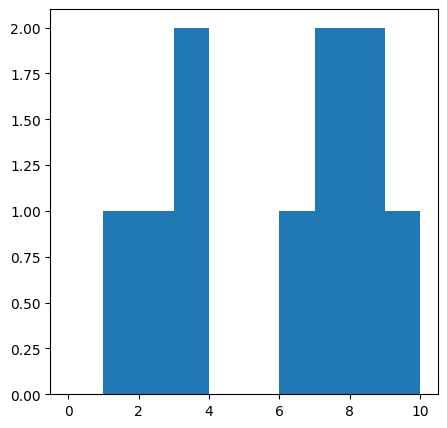

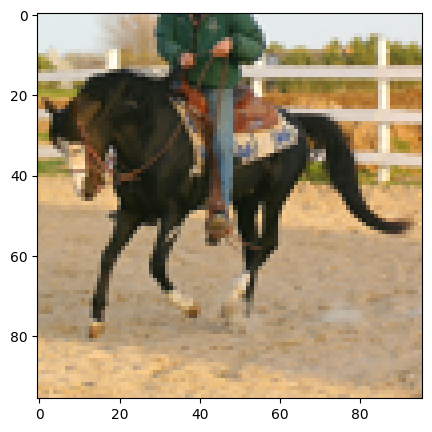

In [140]:


#Implement a nereaest neighbor classifier to classify the images BoW histograms using the euclidean distance

#Define a function to compute the euclidean distance between two histograms

def euclidean_distance(histogram1, histogram2):
    return np.sqrt(np.sum((histogram1 - histogram2) ** 2))


#Define a function to compute the nearest neighbor

def nearest_neighbor(histogram, histograms):
    #Initialize the distances as an empty list
    distances = []
    #For each histogram in histograms
    for hist in histograms:
        #Compute the euclidean distance between the histogram and the histogram in histograms
        dist = euclidean_distance(histogram, hist)
        #Append the distance to the distances list
        distances.append(dist)
    #Return the index of the minimum distance
    return np.argmin(distances)


def predict_image(img, model):
    image_hist = compute_BoW(10, img)
    return nearest_neighbor(image_hist, model)    




predict_array  =  []
for i in range(10):
 
    predicted = compute_BoW(10, [images_test[0]])[0]
    predicted_lbl = nearest_neighbor(predicted, foo)
    predict_array.append(labels_train[predicted_lbl])
   
print(predict_array)

plt.figure(figsize=(5,5))
plt.hist(predict_array, bins=10, range=(0, 10))
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(images_test[0])
plt.show()